### Customer Lifecycle Value
#### Author: Faraz Ahmad (faraza)

We will work on finding the most profitable region-category combo and calculating the CLV.

The first thing you should do is to load the CSV file and understand the dataset. It is important to
understand the dataset and examine if there is any missing values or outliers before doing analysis. In
this step, you should write Python scripts to answer the following questions.
1. Are there any missing values in the dataset? 
2. What is the range of dates in the dataset? 
3. How many unique customers are there in the dataset? 
4. How many unique orders are there in the dataset? 
5. Profile the data to give the standard descriptive statistics for the Sales field. What are the min, max, variance, and standard deviations? 
6. Do transaction amounts (sales) in general increase over time (perhaps due to inflation)? 

In [231]:
import pandas as pd
import numpy as np

In [232]:
df= pd.read_csv("customer_sales.csv", encoding='ISO-8859-1')

In [233]:
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
0,BN-2011-7407039,1/1/2011,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,$45,-26,3
1,AZ-2011-9050313,1/3/2011,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,$854,290,7
2,AZ-2011-6674300,1/4/2011,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,$140,21,3
3,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,$27,-22,2
4,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,$17,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-766953,12/31/2014,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.0,$245,91,2
8043,BN-2014-4140795,12/31/2014,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.5,$30,-10,2
8044,BN-2014-4140795,12/31/2014,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.5,$23,-6,4
8045,BN-2014-4140795,12/31/2014,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.5,$108,-19,3


In [234]:
#Q1
df.isna().sum()

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
dtype: int64

We can observe that there are not a lot of missing values in the dataset

In [235]:
#Q2
df['Order Date']

0         1/1/2011
1         1/3/2011
2         1/4/2011
3         1/4/2011
4         1/4/2011
           ...    
8042    12/31/2014
8043    12/31/2014
8044    12/31/2014
8045    12/31/2014
8046    12/31/2014
Name: Order Date, Length: 8047, dtype: object

In [236]:
df['Date'] = pd.to_datetime(df['Order Date'])

In [237]:
df['Date']

0      2011-01-01
1      2011-01-03
2      2011-01-04
3      2011-01-04
4      2011-01-04
          ...    
8042   2014-12-31
8043   2014-12-31
8044   2014-12-31
8045   2014-12-31
8046   2014-12-31
Name: Date, Length: 8047, dtype: datetime64[ns]

In [238]:
print("Minimum Date in the dataset=", df['Date'].min())
print("Maximum Date in the dataset=", df['Date'].max())

Minimum Date in the dataset= 2011-01-01 00:00:00
Maximum Date in the dataset= 2014-12-31 00:00:00


Thus, the date ranges from 01-01-2011 to 31-12-2014

In [239]:
#Q3
unique_customers=df['Customer Name'].unique()
print("Number of unique customers=", len(unique_customers))


Number of unique customers= 792


In [240]:
#Q4
unique_orders=df['Order ID'].unique()
print("Number of unique orders=", len(unique_orders))

Number of unique orders= 4117


In [241]:
#Q5
df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',', '').astype(float)
print(df['Sales'].describe())

count      8047.000000
mean        316.398658
std        2256.759951
min           3.000000
25%          48.000000
50%         116.000000
75%         313.000000
max      198000.000000
Name: Sales, dtype: float64


In [242]:
print("Variance of Sales= ",  df['Sales'].var())
print("Standard Deviation of Sales= ", df['Sales'].std())

Variance of Sales=  5092965.478138822
Standard Deviation of Sales=  2256.759951376934


Year
2011    611926.0
2012    548880.0
2013    630224.0
2014    755030.0
Name: Sales, dtype: float64


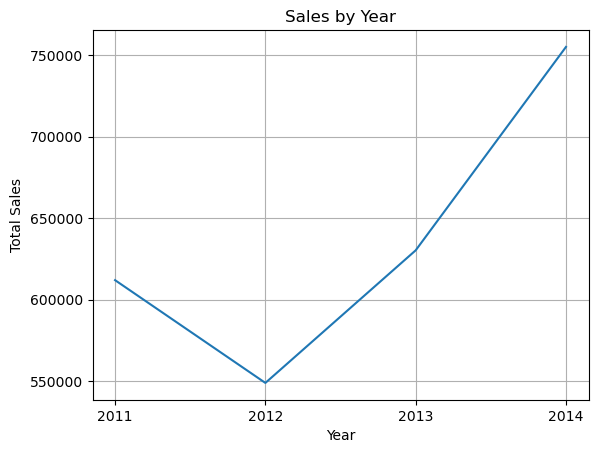

In [243]:
#Q6
import matplotlib.pyplot as plt
import datetime 
df['Year'] = df['Date'].dt.year.astype(str)

total_sales_by_year = df.groupby('Year')['Sales'].sum()
print(total_sales_by_year)
plt.plot(total_sales_by_year)
plt.title("Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


It can be observed that the sales decrease in 2012 but then it continues to increase over the next few years. There seems to be a general upward trend, this could be due to inflation or increased demand. 

#### Part-II
1. Are there any outliers or values that don’t make sense? You can use statistical tests to check for outliers. Or, you can simply plot the histogram of the Sales and see if there is any value that appears to be abnormal. (Hint, is there any value that appears to be abnormally large or small? Could it be caused by bad entries (e.g. forgetting a decimal separator?). If there are outliers , how would you treat them? 


2. Does giving discounts increase sales and/or profits? Make a graph to show that. Comment on what happens at 80% discount level, and what’s the optimum level for maximizing total profit.


3. What factors affect the sales the most? You can run a simple regression to understand the impact. 

In [244]:
#Part-II 
#Q-1
df.sort_values(by='Sales')

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
2162,BN-2012-8400051,6/29/2012,Kristen Holland,Sweden,Stockholm,Solna,North,Consumer,Economy,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",0.5,3.0,-1,1,2012-06-29,2012
3388,AZ-2013-273412,1/14/2013,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0,1,2013-01-14,2013
7097,BN-2014-5531507,9/15/2014,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3,1,2014-09-15,2014
1185,BN-2011-5491702,11/16/2011,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2,1,2011-11-16,2011
6689,AZ-2014-4668799,8/11/2014,Alexandra Portus,Belgium,Antwerp,Antwerp,Central,Corporate,Economy,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Recycled",0.0,5.0,1,1,2014-08-11,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,BN-2013-2755077,6/4/2013,George To Rot,Spain,Castile and León,Valladolid,South,Corporate,Economy Plus,Technology,Phones,"Samsung Smart Phone, VoIP",0.1,5726.0,-445,10,2013-06-04,2013
7590,AZ-2014-6530154,11/19/2014,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.0,64,14,2014-11-19,2014
3196,AZ-2012-9218935,12/13/2012,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,5785.0,405,9,2012-12-13,2012
868,AZ-2011-5313166,9/8/2011,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,6517.0,2476,12,2011-09-08,2011


In [245]:
# Remove rows with negative values in the 'Sales' column
df = df[df['Sales'] >= 0]

# Calculate the IQR of the Sales field
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['Sales'] < lower_boundary) | (df['Sales'] > upper_boundary)]
outliers_count = outliers.shape[0]

lower_boundary, upper_boundary, outliers_count

(-349.5, 710.5, 877)

In [246]:
# Display the top 10 outliers
outliers.sort_values(by='Sales', ascending=False).head(10)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
28,BN-2011-4913858,1/13/2011,Julian Dobie,Netherlands,South Holland,Dordrecht,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.5,198000.0,-131,2,2011-01-13,2011
868,AZ-2011-5313166,9/8/2011,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,6517.0,2476,12,2011-09-08,2011
3196,AZ-2012-9218935,12/13/2012,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,5785.0,405,9,2012-12-13,2012
7590,AZ-2014-6530154,11/19/2014,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.0,64,14,2014-11-19,2014
3975,BN-2013-2755077,6/4/2013,George To Rot,Spain,Castile and León,Valladolid,South,Corporate,Economy Plus,Technology,Phones,"Samsung Smart Phone, VoIP",0.1,5726.0,-445,10,2013-06-04,2013
1970,AZ-2012-5752966,5/29/2012,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.0,2461,9,2012-05-29,2012
711,AZ-2011-5059692,8/10/2011,Natasha Sykes,United Kingdom,England,London,North,Consumer,Economy,Technology,Phones,"Cisco Smart Phone, Cordless",0.1,5277.0,1759,9,2011-08-10,2011
3593,AZ-2013-9761394,2/27/2013,George Dawson,United Kingdom,Scotland,Edinburgh,North,Home Office,Economy Plus,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",0.0,5274.0,1898,10,2013-02-27,2013
6937,AZ-2014-4986921,8/29/2014,Robert James,France,Ile-de-France,Plaisir,Central,Home Office,Economy,Technology,Phones,"Apple Smart Phone, Full Size",0.2,4877.0,746,9,2014-08-29,2014
1834,AZ-2012-6401675,4/22/2012,Indiana Wekey,Germany,Berlin,Berlin,Central,Corporate,Economy,Technology,Copiers,"Canon Wireless Fax, High-Speed",0.1,4748.0,844,14,2012-04-22,2012


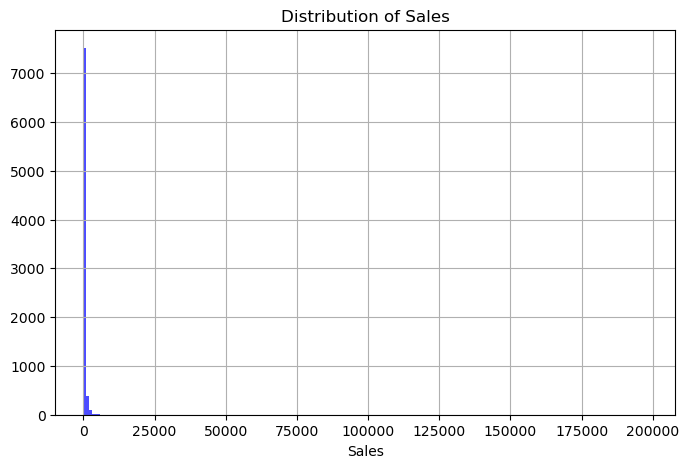

In [247]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of Sales
plt.figure(figsize=(8, 5))
plt.hist(df['Sales'], bins=200, color='blue', alpha=0.7)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.grid(True)
plt.show()


There appears to be an outlier with a value of 198000.0 for sales and it seems to be causing issues in our final calculations. This value is abnormally large. 

In [248]:
outliers.sort_values(by='Sales', ascending=False).tail(20)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
2073,AZ-2012-564106,6/18/2012,Jose Gullo,Germany,Hesse,Frankfurt,Central,Consumer,Economy,Technology,Copiers,"Sharp Copy Machine, Laser",0.0,717.0,93,3,2012-06-18,2012
6351,AZ-2014-381698,6/23/2014,Devin Huddleston,France,Ile-de-France,Saint-Denis,Central,Consumer,Economy,Furniture,Bookcases,"Safco Floating Shelf Set, Mobile",0.1,717.0,16,4,2014-06-23,2014
3222,AZ-2012-9860400,12/17/2012,Morgan Anderson,United Kingdom,England,Bolton,North,Corporate,Economy Plus,Technology,Machines,"Panasonic Receipt Printer, White",0.0,716.0,250,6,2012-12-17,2012
1366,AZ-2011-5720864,12/17/2011,Carrie Boots,Austria,Vienna,Vienna,Central,Corporate,Economy,Technology,Accessories,"Memorex Memory Card, Bluetooth",0.0,716.0,150,7,2011-12-17,2011
9,AZ-2011-2918397,1/7/2011,Fredrick Beveridge,France,Provence-Alpes-Côte d'Azur,La Seyne-sur-Mer,Central,Corporate,Priority,Office Supplies,Storage,"Smead Lockers, Industrial",0.1,716.0,143,4,2011-01-07,2011
2067,AZ-2012-2961412,6/18/2012,Libby McDonald,United Kingdom,England,Bradford,North,Home Office,Economy Plus,Technology,Phones,"Motorola Signal Booster, VoIP",0.0,716.0,36,5,2012-06-18,2012
3727,AZ-2013-755831,4/4/2013,Luca Varley,France,Alsace-Champagne-Ardenne-Lorraine,Thionville,Central,Corporate,Priority,Technology,Machines,"Epson Card Printer, White",0.2,716.0,101,5,2013-04-04,2013
525,BN-2011-3154402,6/17/2011,Larry Lambert,Sweden,Västra Götaland,Gothenburg,North,Consumer,Economy,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, ...",0.5,714.0,-143,3,2011-06-17,2011
5522,AZ-2014-2835554,1/17/2014,Holly Doyle,France,Corsica,Bastia,Central,Consumer,Economy Plus,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309,4,2014-01-17,2014
2030,AZ-2012-7754388,6/12/2012,Mark Briggs,Germany,Lower Saxony,Munster,Central,Consumer,Economy,Office Supplies,Storage,"Eldon Lockers, Industrial",0.1,714.0,309,4,2012-06-12,2012


In [249]:
df['Sales'].describe()

count      8047.000000
mean        316.398658
std        2256.759951
min           3.000000
25%          48.000000
50%         116.000000
75%         313.000000
max      198000.000000
Name: Sales, dtype: float64

In [250]:
df.sort_values(by= 'Sales', ascending=False, inplace = True)

Outliers can be handled in the following ways:-

1.  Drop the outliers if you think are truly invalid data points


2. Winsorizing: “Squeezing” the outliers
    - Replace all values below the 1 st percentile with the 1 st percentile value
    - Replace all values about the 99 th percentile with the 99 th percentile value   

In our case since we have observed a highly abnormaly value for sales, we can drop the value for our further analysis. 

In [251]:
df= df.iloc[1:]

In [252]:
df['Sales'].describe()

count    8046.000000
mean      291.829480
std       485.250068
min         3.000000
25%        48.000000
50%       116.000000
75%       313.000000
max      6517.000000
Name: Sales, dtype: float64

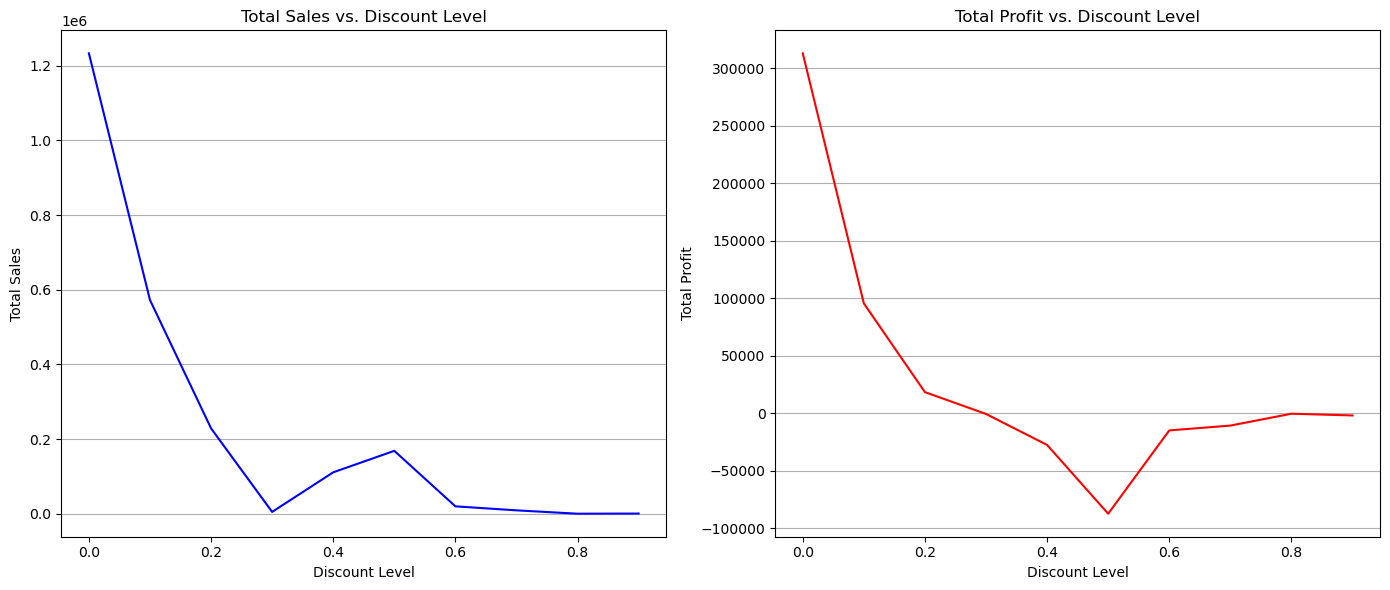

Sales at 80% Discount Levels
1528    70.0
7924    47.0
4346    22.0
Name: Sales, dtype: float64
Profits at 80% Discount Levels
1528   -271
7924   -114
4346    -41
Name: Profit, dtype: int64


In [253]:
#Part II
#Q-2
grouped_sales = df.groupby('Discount')['Sales'].sum()
grouped_profit = df.groupby('Discount')['Profit'].sum()
discount_levels = grouped_sales.index
total_sales = grouped_sales.values
total_profit = grouped_profit.values
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].plot(discount_levels, total_sales, color='blue')
axes[0].set_title("Total Sales vs. Discount Level")
axes[0].set_xlabel("Discount Level")
axes[0].set_ylabel("Total Sales")
axes[0].grid(axis='y')

axes[1].plot(discount_levels, total_profit, color='red')
axes[1].set_title("Total Profit vs. Discount Level")
axes[1].set_xlabel("Discount Level")
axes[1].set_ylabel("Total Profit")
axes[1].grid(axis='y')

plt.tight_layout()

plt.show()

print("Sales at 80% Discount Levels")
print(df[df['Discount'] == 0.8]['Sales'])
print("Profits at 80% Discount Levels")
print(df[df['Discount']==0.8]['Profit'])



The data analysis reveals a trend: as discount levels increase, both sales and profits decrease. This trend is especially pronounced at the 0.8 discount level, where both sales and profits tend to approach zero. A few possible reasons for this can be:-

- Margin Erosion: Higher discounts may lead to reduced profit margins, as the cost of goods remains relatively constant while revenues decrease.

- Price Sensitivity: Customers may become more price-sensitive at higher discount levels, causing reduced sales and profits as they wait for better deals.

A low discount level would be optimum given the sales and profits data. [0-10%, the data for sales and profit peaks at 0% discount levels]

In [254]:
import statsmodels.api as sm

#To understand the impact, we can perform a linear regression, some independent variables factors that can be used here are Discount and Quantity. 
X = df[['Discount', 'Quantity']] 
y = df['Sales']  

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()  

print(model.summary())

d = pd.get_dummies(df, columns=['Category'], drop_first=True)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     575.9
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.86e-234
Time:                        03:59:39   Log-Likelihood:                -60640.
No. Observations:                8046   AIC:                         1.213e+05
Df Residuals:                    8043   BIC:                         1.213e+05
Df Model:                           2                                         
Covariance Type:            nonrobust  

#### Interpretation

- Constant (Intercept): The constant term represents the predicted value of 'Sales' when both 'Discount' and 'Quantity' are zero. In this model, the constant is 3.1990.

- Discount: The coefficient for 'Discount' is -45.5064. This coefficient indicates that, while holding 'Quantity' constant, a one-unit increase in 'Discount' is associated with a decrease of approximately $45.51 in 'Sales.' However, it's important to note that the p-value for 'Discount' is 0.100, which is greater than the typical significance level of 0.05. This suggests that 'Discount' may not be statistically significant in predicting 'Sales' at the 0.05 level.

- Quantity: The coefficient for 'Quantity' is 77.8655. This coefficient indicates that, while holding 'Discount' constant, a one-unit increase in 'Quantity' is associated with an increase of approximately $77.87 in 'Sales.' The p-value for 'Quantity' is very close to zero, indicating that 'Quantity' is highly statistically significant in predicting 'Sales.

We can observe that quantity is an important factor that seems to significantly affect the sales. 

In [255]:
#If we would like to understand a the effect of a categorical variable like category,  segment and ship-mode for a more comprehensive analysis we can include them in our regression
data_dummy = pd.get_dummies(df, columns=['Category','Segment','Ship Mode' ], drop_first=True)
columns_to_convert = ['Category_Office Supplies', 'Category_Technology', 'Segment_Corporate', 'Segment_Home Office', 'Ship Mode_Economy Plus', 'Ship Mode_Immediate', 'Ship Mode_Priority']
data_dummy[columns_to_convert] = data_dummy[columns_to_convert].astype(int)
data_dummy


,Order ID,Order Date,Customer Name,Country,State,City,Region,Sub-Category,Product Name,Discount,...,Quantity,Date,Year,Category_Office Supplies,Category_Technology,Segment_Corporate,Segment_Home Office,Ship Mode_Economy Plus,Ship Mode_Immediate,Ship Mode_Priority
868,AZ-2011-5313166,9/8/2011,Alexander Bond,Spain,Galicia,Lugo,South,Appliances,"Hamilton Beach Stove, Silver",0.0,...,12,2011-09-08,2011,1,0,1,0,1,0,0
3196,AZ-2012-9218935,12/13/2012,Lara Giles,United Kingdom,England,Huddersfield,North,Phones,"Motorola Smart Phone, Cordless",0.0,...,9,2012-12-13,2012,0,1,0,0,0,0,0
7590,AZ-2014-6530154,11/19/2014,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,...,14,2014-11-19,2014,0,0,0,0,0,0,0
3975,BN-2013-2755077,6/4/2013,George To Rot,Spain,Castile and León,Valladolid,South,Phones,"Samsung Smart Phone, VoIP",0.1,...,10,2013-06-04,2013,0,1,1,0,1,0,0
1970,AZ-2012-5752966,5/29/2012,Harrison Cooke,United Kingdom,England,Luton,North,Phones,"Nokia Smart Phone, Full Size",0.0,...,9,2012-05-29,2012,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741,AZ-2014-2672334,2/27/2014,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Labels,"Avery Round Labels, Adjustable",0.0,...,1,2014-02-27,2014,1,0,1,0,0,0,1
3388,AZ-2013-273412,1/14/2013,Zachary Warner,Austria,Vienna,Vienna,Central,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,...,1,2013-01-14,2013,1,0,0,0,0,1,0
7097,BN-2014-5531507,9/15/2014,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Labels,"Hon Removable Labels, Adjustable",0.5,...,1,2014-09-15,2014,1,0,1,0,0,0,0
1185,BN-2011-5491702,11/16/2011,Claudia Poore,Sweden,Stockholm,Stockholm,North,Binders,"Ibico Hole Reinforcements, Durable",0.5,...,1,2011-11-16,2011,1,0,1,0,0,0,0


In [256]:
independent_variables = ['Category_Office Supplies', 'Category_Technology', 'Segment_Corporate', 'Segment_Home Office',
                         'Ship Mode_Economy Plus', 'Ship Mode_Immediate', 'Ship Mode_Priority', 'Quantity', 'Discount']

X = data_dummy[independent_variables]
y = data_dummy['Sales']

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:59:39   Log-Likelihood:                -59851.
No. Observations:                8046   AIC:                         1.197e+05
Df Residuals:                    8036   BIC:                         1.198e+05
Df Model:                           9                                         
Covariance Type:            nonrobust  

#### Interpretation when other coefficients are used

- Category_Office Supplies (-372.5771): The coefficient for 'Category_Office Supplies' is statistically significant (p-value < 0.05). This coefficient represents the change in 'Sales' associated with products in the 'Office Supplies' category compared to the reference category (which is not shown in the output). A negative coefficient suggests that, on average, products in the 'Office Supplies' category are associated with a decrease in 'Sales' compared to the reference category.

- Category_Technology (57.8160): The coefficient for 'Category_Technology' is statistically significant (p-value < 0.05). This coefficient represents the change in 'Sales' associated with products in the 'Technology' category compared to the reference category. A positive coefficient suggests that, on average, products in the 'Technology' category are associated with an increase in 'Sales' compared to the reference category.

- Ship Mode_Economy Plus (26.4657): The coefficient for 'Ship Mode_Economy Plus' is statistically significant (p-value < 0.05). This coefficient represents the change in 'Sales' associated with using the 'Economy Plus' shipping mode compared to the reference mode (not shown in the output). A positive coefficient suggests that, on average, using the 'Economy Plus' shipping mode is associated with an increase in 'Sales' compared to the reference mode.

- Ship Mode_Immediate (43.5717): The coefficient for 'Ship Mode_Immediate' is statistically significant (p-value < 0.05). This coefficient represents the change in 'Sales' associated with using the 'Immediate' shipping mode compared to the reference mode. A positive coefficient suggests that, on average, using the 'Immediate' shipping mode is associated with an increase in 'Sales' compared to the reference mode.

- Quantity (77.5225): The coefficient for 'Quantity' is statistically significant (p-value < 0.05). This coefficient represents the change in 'Sales' associated with a one-unit increase in the quantity of products sold. A positive coefficient indicates that, on average, increasing the quantity of products sold is associated with an increase in 'Sales.'

- Discount (-178.6498): The coefficient for 'Discount' is statistically significant (p-value < 0.05). This coefficient represents the change in 'Sales' associated with a one-unit increase in the discount level. A negative coefficient suggests that, on average, increasing the discount level is associated with a decrease in 'Sales.'



#### Part-III

1. Determine origin year of customers  Some of the underlying customers are brand new and others have been customers for almost five years. The newer customers will have (generally) spent less on average than the old ones. You need to separate the customers into groups based on how long ago they were acquired (e.g. customers acquired in 2010, vs customers acquired in 2011, ...). First, assign customers into different groups based on the date of acquisition (origin year). For instance, the earliest transaction date that can be found for customer 2 in the dataset is 5/15/12. Then we assign customer 2 into group 2012 as this customer was acquired in the year 2012. Write Python scripts to assign the appropriate origin year to all customers. 

2. Calculate cumulative transaction amounts for customers in each group of origin year

3. Calculate the number of new customers

4. Historic CLV

In [257]:
#Determine origin year of customers 
#We have already computed the year of the customers earlier 

#df['Year'] = df['Order Date'].dt.year
df

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year
868,AZ-2011-5313166,9/8/2011,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,6517.0,2476,12,2011-09-08,2011
3196,AZ-2012-9218935,12/13/2012,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,5785.0,405,9,2012-12-13,2012
7590,AZ-2014-6530154,11/19/2014,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.0,64,14,2014-11-19,2014
3975,BN-2013-2755077,6/4/2013,George To Rot,Spain,Castile and León,Valladolid,South,Corporate,Economy Plus,Technology,Phones,"Samsung Smart Phone, VoIP",0.1,5726.0,-445,10,2013-06-04,2013
1970,AZ-2012-5752966,5/29/2012,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.0,2461,9,2012-05-29,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741,AZ-2014-2672334,2/27/2014,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,Labels,"Avery Round Labels, Adjustable",0.0,5.0,1,1,2014-02-27,2014
3388,AZ-2013-273412,1/14/2013,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0,1,2013-01-14,2013
7097,BN-2014-5531507,9/15/2014,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3,1,2014-09-15,2014
1185,BN-2011-5491702,11/16/2011,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2,1,2011-11-16,2011


In [258]:
df[['Year','Customer Name']]

,Year,Customer Name
868,2011,Alexander Bond
3196,2012,Lara Giles
7590,2014,Bettie Lang
3975,2013,George To Rot
1970,2012,Harrison Cooke
...,...,...
5741,2014,Alexander Bond
3388,2013,Zachary Warner
7097,2014,Kayla Tearle
1185,2011,Claudia Poore


In [259]:
# Need to identify the first year the customer made a transaction
dfEarlyOrder = df.groupby('Customer Name')['Year'].min()
dfEarlyOrder


Customer Name
Aaron Bootman       2011
Aaron Cunningham    2011
Aaron Davey         2011
Aaron Macrossan     2011
Abbie Perry         2011
                    ... 
Zara Loton          2013
Zara Money          2011
Zoe Lanigan         2011
Zoe Lowin           2011
Zona Meyer          2012
Name: Year, Length: 792, dtype: object

In [260]:
df_final = pd.merge(df, dfEarlyOrder, on = 'Customer Name', how = 'left')
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,Year_x,Year_y
0,AZ-2011-5313166,9/8/2011,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,6517.0,2476,12,2011-09-08,2011,2011
1,AZ-2012-9218935,12/13/2012,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,5785.0,405,9,2012-12-13,2012,2012
2,AZ-2014-6530154,11/19/2014,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.0,64,14,2014-11-19,2014,2011
3,BN-2013-2755077,6/4/2013,George To Rot,Spain,Castile and León,Valladolid,South,Corporate,Economy Plus,Technology,Phones,"Samsung Smart Phone, VoIP",0.1,5726.0,-445,10,2013-06-04,2013,2011
4,AZ-2012-5752966,5/29/2012,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.0,2461,9,2012-05-29,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,AZ-2014-2672334,2/27/2014,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,Labels,"Avery Round Labels, Adjustable",0.0,5.0,1,1,2014-02-27,2014,2011
8042,AZ-2013-273412,1/14/2013,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0,1,2013-01-14,2013,2011
8043,BN-2014-5531507,9/15/2014,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3,1,2014-09-15,2014,2011
8044,BN-2011-5491702,11/16/2011,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2,1,2011-11-16,2011,2011


In [261]:
df_final.rename(columns = {'Year_y': 'OriginYear', 'Year_x':'LastSale'}, inplace = True)

In [262]:
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,LastSale,OriginYear
0,AZ-2011-5313166,9/8/2011,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,6517.0,2476,12,2011-09-08,2011,2011
1,AZ-2012-9218935,12/13/2012,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,5785.0,405,9,2012-12-13,2012,2012
2,AZ-2014-6530154,11/19/2014,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.0,64,14,2014-11-19,2014,2011
3,BN-2013-2755077,6/4/2013,George To Rot,Spain,Castile and León,Valladolid,South,Corporate,Economy Plus,Technology,Phones,"Samsung Smart Phone, VoIP",0.1,5726.0,-445,10,2013-06-04,2013,2011
4,AZ-2012-5752966,5/29/2012,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.0,2461,9,2012-05-29,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,AZ-2014-2672334,2/27/2014,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,Labels,"Avery Round Labels, Adjustable",0.0,5.0,1,1,2014-02-27,2014,2011
8042,AZ-2013-273412,1/14/2013,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0,1,2013-01-14,2013,2011
8043,BN-2014-5531507,9/15/2014,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3,1,2014-09-15,2014,2011
8044,BN-2011-5491702,11/16/2011,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2,1,2011-11-16,2011,2011


In [263]:
#Calculating cumalative transaction amounts
df_final['Age'] = (df_final['Date'] - pd.to_datetime(df_final['OriginYear'], format='%Y')).dt.days / 31
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Date,LastSale,OriginYear,Age
0,AZ-2011-5313166,9/8/2011,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",0.0,6517.0,2476,12,2011-09-08,2011,2011,8.064516
1,AZ-2012-9218935,12/13/2012,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,Phones,"Motorola Smart Phone, Cordless",0.0,5785.0,405,9,2012-12-13,2012,2012,11.193548
2,AZ-2014-6530154,11/19/2014,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",0.1,5729.0,64,14,2014-11-19,2014,2011,45.741935
3,BN-2013-2755077,6/4/2013,George To Rot,Spain,Castile and León,Valladolid,South,Corporate,Economy Plus,Technology,Phones,"Samsung Smart Phone, VoIP",0.1,5726.0,-445,10,2013-06-04,2013,2011,28.548387
4,AZ-2012-5752966,5/29/2012,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",0.0,5725.0,2461,9,2012-05-29,2012,2012,4.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,AZ-2014-2672334,2/27/2014,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,Labels,"Avery Round Labels, Adjustable",0.0,5.0,1,1,2014-02-27,2014,2011,37.193548
8042,AZ-2013-273412,1/14/2013,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0,1,2013-01-14,2013,2011,24.000000
8043,BN-2014-5531507,9/15/2014,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Labels,"Hon Removable Labels, Adjustable",0.5,4.0,-3,1,2014-09-15,2014,2011,43.645161
8044,BN-2011-5491702,11/16/2011,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2,1,2011-11-16,2011,2011,10.290323


In [264]:
def ageRangeFunc(d):
    if (d['Age'] <= 12):
        return 12
    elif (d['Age'] > 12 and d['Age']<= 24):
        return 24
    elif (d['Age'] > 24 and d['Age']<= 36):
        return 36
    elif (d['Age'] > 36 and d['Age']<= 48):
        return 48
    elif (d['Age'] > 48 and d['Age']<= 60):
        return 60
    else:
        return 72

In [265]:
df_final['AgeRange'] = df_final.apply(ageRangeFunc, axis = 1)
df_final

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Date,LastSale,OriginYear,Age,AgeRange
0,AZ-2011-5313166,9/8/2011,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,...,"Hamilton Beach Stove, Silver",0.0,6517.0,2476,12,2011-09-08,2011,2011,8.064516,12
1,AZ-2012-9218935,12/13/2012,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,...,"Motorola Smart Phone, Cordless",0.0,5785.0,405,9,2012-12-13,2012,2012,11.193548,12
2,AZ-2014-6530154,11/19/2014,Bettie Lang,France,Nord-Pas-de-Calais-Picardie,Lille,Central,Consumer,Economy,Furniture,...,"Hon Executive Leather Armchair, Adjustable",0.1,5729.0,64,14,2014-11-19,2014,2011,45.741935,48
3,BN-2013-2755077,6/4/2013,George To Rot,Spain,Castile and León,Valladolid,South,Corporate,Economy Plus,Technology,...,"Samsung Smart Phone, VoIP",0.1,5726.0,-445,10,2013-06-04,2013,2011,28.548387,36
4,AZ-2012-5752966,5/29/2012,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,...,"Nokia Smart Phone, Full Size",0.0,5725.0,2461,9,2012-05-29,2012,2012,4.806452,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,AZ-2014-2672334,2/27/2014,Alexander Bond,France,Nord-Pas-de-Calais-Picardie,Wasquehal,Central,Corporate,Priority,Office Supplies,...,"Avery Round Labels, Adjustable",0.0,5.0,1,1,2014-02-27,2014,2011,37.193548,48
8042,AZ-2013-273412,1/14/2013,Zachary Warner,Austria,Vienna,Vienna,Central,Consumer,Immediate,Office Supplies,...,"Wilson Jones Hole Reinforcements, Clear",0.0,4.0,0,1,2013-01-14,2013,2011,24.000000,24
8043,BN-2014-5531507,9/15/2014,Kayla Tearle,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,...,"Hon Removable Labels, Adjustable",0.5,4.0,-3,1,2014-09-15,2014,2011,43.645161,48
8044,BN-2011-5491702,11/16/2011,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,...,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2,1,2011-11-16,2011,2011,10.290323,12


In [266]:
trans_amount = df_final.pivot_table(values='Sales', index='OriginYear', columns='AgeRange', aggfunc = 'sum')
trans_amount

AgeRange,12,24,36,48
OriginYear,,,,
2011,415881.0,347416.0,392570.0,458555.0
2012,217155.0,171420.0,189469.0,NaN
2013,79748.0,63738.0,NaN,NaN
2014,12108.0,NaN,NaN,NaN


In [267]:
trans_amount = trans_amount.cumsum(axis = 1) #axis = 1 to find cumalative sum over columns
print(trans_amount)

AgeRange          12        24         36         48
OriginYear                                          
2011        415881.0  763297.0  1155867.0  1614422.0
2012        217155.0  388575.0   578044.0        NaN
2013         79748.0  143486.0        NaN        NaN
2014         12108.0       NaN        NaN        NaN


In [268]:
#Calculating new customers
# finding new customers. where origin year matches the transaction year
df_customer = df_final[df_final['OriginYear'] == df_final['LastSale']]

In [269]:
df_customer

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Date,LastSale,OriginYear,Age,AgeRange
0,AZ-2011-5313166,9/8/2011,Alexander Bond,Spain,Galicia,Lugo,South,Corporate,Economy Plus,Office Supplies,...,"Hamilton Beach Stove, Silver",0.0,6517.0,2476,12,2011-09-08,2011,2011,8.064516,12
1,AZ-2012-9218935,12/13/2012,Lara Giles,United Kingdom,England,Huddersfield,North,Consumer,Economy,Technology,...,"Motorola Smart Phone, Cordless",0.0,5785.0,405,9,2012-12-13,2012,2012,11.193548,12
4,AZ-2012-5752966,5/29/2012,Harrison Cooke,United Kingdom,England,Luton,North,Consumer,Immediate,Technology,...,"Nokia Smart Phone, Full Size",0.0,5725.0,2461,9,2012-05-29,2012,2012,4.806452,12
5,AZ-2011-5059692,8/10/2011,Natasha Sykes,United Kingdom,England,London,North,Consumer,Economy,Technology,...,"Cisco Smart Phone, Cordless",0.1,5277.0,1759,9,2011-08-10,2011,2011,7.129032,12
8,AZ-2012-6401675,4/22/2012,Indiana Wekey,Germany,Berlin,Berlin,Central,Corporate,Economy,Technology,...,"Canon Wireless Fax, High-Speed",0.1,4748.0,844,14,2012-04-22,2012,2012,3.612903,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8034,BN-2011-1778575,10/8/2011,Daniel Burke,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,"Cardinal Hole Reinforcements, Clear",0.5,5.0,0,2,2011-10-08,2011,2011,9.032258,12
8038,BN-2011-553410,5/21/2011,Bianca Monsoor,Netherlands,North Brabant,Breda,Central,Consumer,Economy Plus,Office Supplies,...,"Wilson Jones Hole Reinforcements, Economy",0.5,5.0,0,2,2011-05-21,2011,2011,4.516129,12
8040,AZ-2012-7448408,7/14/2012,Jacob Varley,United Kingdom,England,Sheffield,North,Corporate,Economy,Office Supplies,...,"Kraft Clasp Envelope, Set of 50",0.5,5.0,-5,1,2012-07-14,2012,2012,6.290323,12
8044,BN-2011-5491702,11/16/2011,Claudia Poore,Sweden,Stockholm,Stockholm,North,Corporate,Economy,Office Supplies,...,"Ibico Hole Reinforcements, Durable",0.5,4.0,-2,1,2011-11-16,2011,2011,10.290323,12


In [270]:
df_customer.duplicated(subset = ['Customer Name']).value_counts()

True     1680
False     792
Name: count, dtype: int64

In [271]:
new_cust = df_final.groupby('OriginYear')['Customer Name'].nunique()
new_cust

OriginYear
2011    493
2012    204
2013     78
2014     17
Name: Customer Name, dtype: int64

| AgeRange |  12 |  24 |  36 |  48 |
|----------|----:|----:|----:|----:|
| 2011     | 493 | 493 | 493 | 493 |
| 2012     | 204 | 204 | 204 | Nan |
| 2013     | 78  | 78  | Nan | Nan |
| 2014     | 17  | Nan | Nan | Nan |


In [272]:
#Calculating historic CLV
unpivot_trans = trans_amount.reset_index().melt(id_vars=["OriginYear"], var_name="Age", value_name="Value")
df_final_trans = unpivot_trans.merge(new_cust, on = 'OriginYear', how = 'left')
df_final_trans.rename(columns = {'Customer Name': 'NewCust'}, inplace = True)
df_final_trans

,OriginYear,Age,Value,NewCust
0,2011,12,415881.0,493
1,2012,12,217155.0,204
2,2013,12,79748.0,78
3,2014,12,12108.0,17
4,2011,24,763297.0,493
5,2012,24,388575.0,204
6,2013,24,143486.0,78
7,2014,24,NaN,17
8,2011,36,1155867.0,493
9,2012,36,578044.0,204


In [273]:
df_final_trans['CLV'] = df_final_trans['Value'] / df_final_trans['NewCust']
df_final_trans

,OriginYear,Age,Value,NewCust,CLV
0,2011,12,415881.0,493,843.572008
1,2012,12,217155.0,204,1064.485294
2,2013,12,79748.0,78,1022.410256
3,2014,12,12108.0,17,712.235294
4,2011,24,763297.0,493,1548.269777
5,2012,24,388575.0,204,1904.779412
6,2013,24,143486.0,78,1839.564103
7,2014,24,NaN,17,NaN
8,2011,36,1155867.0,493,2344.557809
9,2012,36,578044.0,204,2833.549020


In [274]:
CLV_table = df_final_trans.pivot_table(values='CLV', index='OriginYear', columns='Age', aggfunc = 'sum')
print(CLV_table)

Age                  12           24           36           48
OriginYear                                                    
2011         843.572008  1548.269777  2344.557809  3274.689655
2012        1064.485294  1904.779412  2833.549020     0.000000
2013        1022.410256  1839.564103     0.000000     0.000000
2014         712.235294     0.000000     0.000000     0.000000


<Axes: xlabel='Age', ylabel='CLV'>

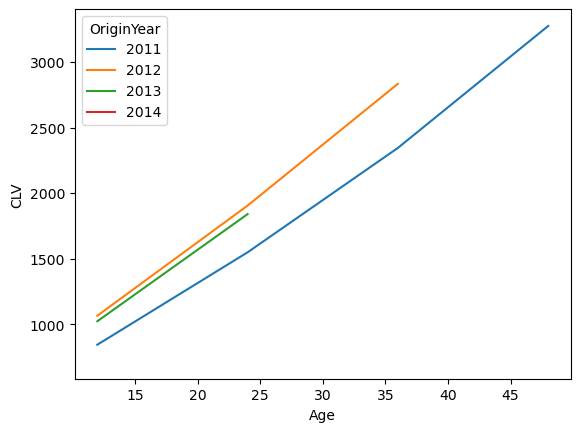

In [275]:
import seaborn as sns
sns.lineplot(x = df_final_trans['Age'], y = df_final_trans['CLV'], hue = df_final_trans['OriginYear'])

In [276]:
df_final_trans.groupby('Age')['CLV'].mean()

Age
12     910.675713
24    1764.204430
36    2589.053414
48    3274.689655
Name: CLV, dtype: float64

#### Some observations

- Customers acquired in 2011 have spent 3274.68 till date. 
- Older customers tend to contribute more towards the sales, thus the business should be focused on retaining older customers.